## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (cross_val_score, GridSearchCV,StratifiedKFold, RepeatedStratifiedKFold)
from sklearn.metrics import (accuracy_score, average_precision_score,roc_auc_score, make_scorer)
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the dataset

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
url = "https://docs.google.com/spreadsheets/d/1B1_a9fKK4-U_6P9GKI4WItP5T0GumQDxccOOXLUEzgg/gviz/tq?tqx=out:csv"
df = pd.read_csv(url)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


##EDA Exploration

In [0]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [0]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [0]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


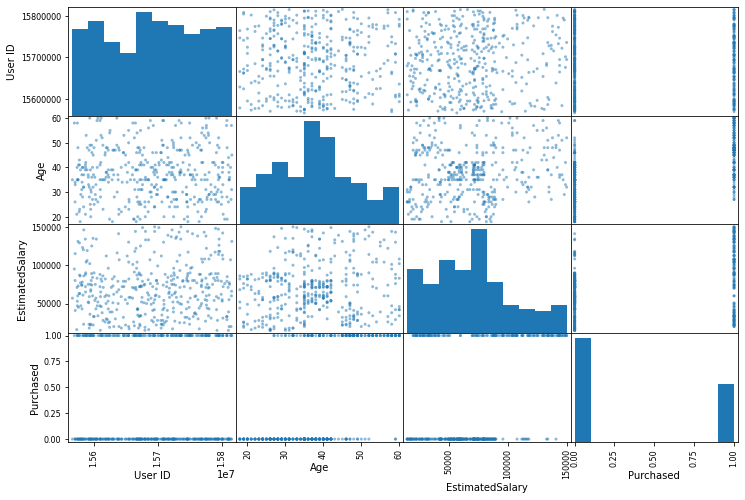

In [0]:
scatter_matrix(df, figsize=[12, 8]);

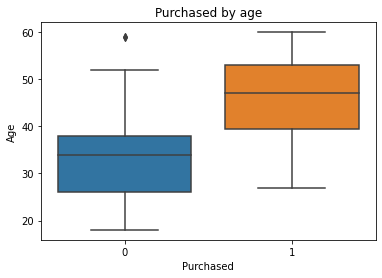

In [0]:
type = pd.concat([df['Purchased'], df['Age']], axis=1)
fig = sns.boxplot(x='Purchased', y='Age', data=type).set_title("Purchased by age")

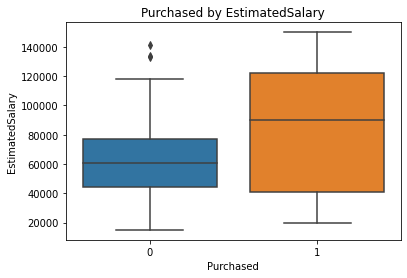

In [0]:
type = pd.concat([df['Purchased'], df['EstimatedSalary']], axis=1)
fig = sns.boxplot(x='Purchased', y='EstimatedSalary', data=type).set_title("Purchased by EstimatedSalary")

In [0]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

##Normalize data

In [0]:
X = preprocessing.normalize(X)

## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Training the Random Forest Classification model on the Training set

In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting the Test set results

In [0]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[49 19]
 [23  9]]


In [0]:
p = make_pipeline(StandardScaler(),
RandomForestClassifier())
p

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=F

In [0]:
cv = RepeatedStratifiedKFold(n_splits=3,
n_repeats=5,
random_state=42)

In [0]:
scores = cross_val_score(p, X, y, cv=cv)

In [0]:
np.array(scores).reshape(5, 3)

array([[0.59701493, 0.59398496, 0.61654135],
       [0.62686567, 0.54887218, 0.60902256],
       [0.63432836, 0.60150376, 0.63157895],
       [0.58208955, 0.66165414, 0.61654135],
       [0.6119403 , 0.61654135, 0.55639098]])

In [0]:
min(scores)

0.5488721804511278

In [0]:
max(scores)

0.6616541353383458

In [0]:
param_grid = dict(randomforestclassifier__n_estimators=range(5, 50, 5))
param_grid

{'randomforestclassifier__n_estimators': range(5, 50, 5)}

In [0]:
scoring = {'Accuracy': make_scorer(accuracy_score)}
grid_search = GridSearchCV(p, param_grid=param_grid, cv=cv, scoring=scoring,refit='Accuracy',return_train_score=True)
grid_search.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=42),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='...
                             

In [0]:
results = grid_search.cv_results_

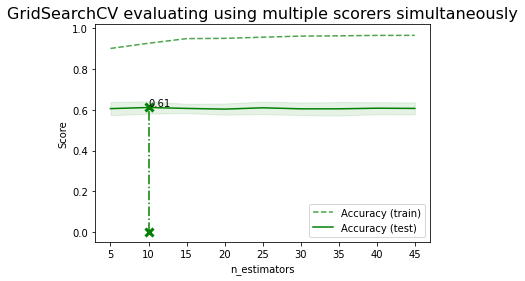

In [0]:
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
fontsize=16)
plt.xlabel("n_estimators")
plt.ylabel("Score")
ax = plt.gca()
X_axis = np.array(results['param_randomforestclassifier__n_estimators'].data,dtype=float)
for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
         sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
         sample_score_std = results['std_%s_%s' % (sample, scorer)]
         ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                 sample_score_mean + sample_score_std,
                 alpha=0.1 if sample == 'test' else 0, color=color)
         ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))
    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
           linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
          (X_axis[best_index], best_score + 0.005))
plt.legend(loc="best")
plt.grid(False)
plt.show()


In [0]:
best_parameters = grid_search.best_estimator_.get_params()
best_parameters

{'memory': None,
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impu

In [0]:
param_grid = dict(randomforestclassifier__n_estimators=range(5, 30, 5),
           randomforestclassifier__max_samples=[0.1, 0.25, 0.5],
          randomforestclassifier__max_features=[1, 2])
scoring = {'Accuracy': make_scorer(accuracy_score)}
grid_search = GridSearchCV(p,
              param_grid=param_grid,
              cv=cv,
              scoring=scoring,
              refit='Accuracy',
              return_train_score=True)
grid_search.fit(X, y)
best_parameters = grid_search.best_estimator_.get_params()
best_parameters

{'memory': None,
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features=2,
                        max_leaf_nodes=None, max_samples=0.1,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=20,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 2,
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': 0.1,
 'randomforestclassifier__min_impurity_decreas

## AdaBoost

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [0]:
classifier2 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [0]:
predictions = classifier2.predict(X_test)
confusion_matrix2=confusion_matrix(y_test, predictions)
confusion_matrix2

array([[49, 19],
       [20, 12]])

##Compare Accuracy of Random Forest with AdaBoost

In [0]:
print("Accuracy on Test Set for Random Forest: %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scores1 = cross_val_score( classifier, X_train, y_train, cv=2)
print("Random Forest CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scores1.mean(), scores1.std() ))
print("Accuracy on Test Set for AdaBoost: %.2f" % ((confusion_matrix2[0,0] + confusion_matrix2[1,1] )/len(X_test)))
scores2 = cross_val_score( classifier2, X_train, y_train, cv=2)
print("AdaBoost CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scores2.mean(), scores2.std() ))

Accuracy on Test Set for Random Forest: 0.58
Random Forest CrossVal Train Set Accuracy Mean: 0.61 and Standard Deviation: 0.01 

Accuracy on Test Set for AdaBoost: 0.61
AdaBoost CrossVal Train Set Accuracy Mean: 0.61 and Standard Deviation: 0.01 

